In [1]:
# libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/440_dataset/IMDB Dataset.csv')


# Use a pretrained representation technique to convert the reviews into vectors
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
word_index = tokenizer.word_index

# Load GloVe vectors
embeddings_index = {}
with open('/content/drive/My Drive/440_dataset/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Prepare embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Convert the reviews into vectors
sequences = tokenizer.texts_to_sequences(data['review'])
sequences = pad_sequences(sequences, maxlen=256)
# Convert the 'sentiment' column to binary format
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

Mounted at /content/drive


In [2]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(sequences, data['sentiment'], test_size=0.2)

In [3]:
# verifying if the split was done correctly or not
print(len(X_train)," ",len(X_test))

40000   10000


In [4]:
data.describe()

,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [6]:
# Print the first 10 words in the GloVe dataset
print(list(embeddings_index.keys())[:10])

# a specific word 'the'
print(embeddings_index['the'])


['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  

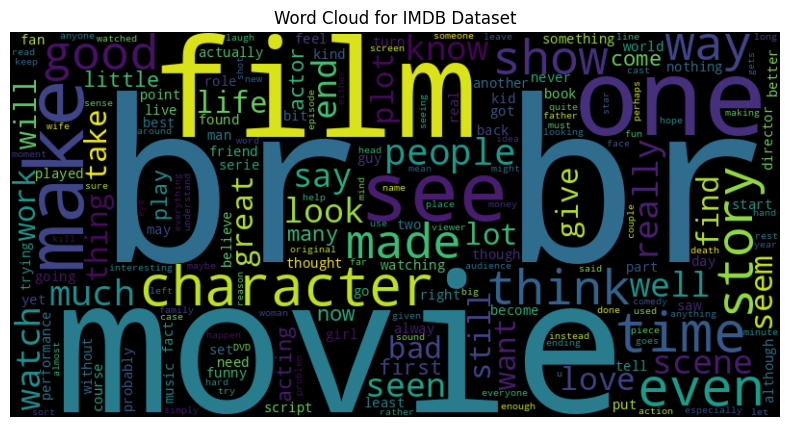

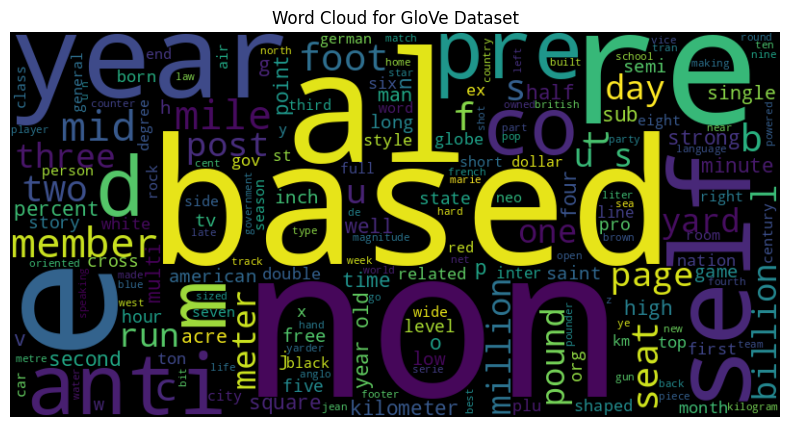

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# word cloud for the IMDB dataset
imdb_words = ' '.join(data['review'])
imdb_wordcloud = WordCloud(width=800, height=400).generate(imdb_words)

plt.figure(figsize=(10, 5))
plt.imshow(imdb_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for IMDB Dataset')
plt.show()

# word cloud for the GloVe dataset
glove_words = ' '.join(embeddings_index.keys())
glove_wordcloud = WordCloud(width=800, height=400).generate(glove_words)

plt.figure(figsize=(10, 5))
plt.imshow(glove_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for GloVe Dataset')
plt.show()



**SHALLOW MODEL**

In [8]:
# Define the shallow model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix]))
model.add(SimpleRNN(10))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         12425300  
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                1110      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 12426421 (47.40 MB)
Trainable params: 12426421 (47.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Test the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/20
1250/1250 [==============================] - 222s 177ms/step - loss: 0.6448 - accuracy: 0.6145
Epoch 2/20
1250/1250 [==============================] - 259s 207ms/step - loss: 0.5041 - accuracy: 0.7586
Epoch 3/20
1250/1250 [==============================] - 251s 201ms/step - loss: 0.4524 - accuracy: 0.7904
Epoch 4/20
1250/1250 [==============================] - 265s 212ms/step - loss: 0.3665 - accuracy: 0.8471
Epoch 5/20
1250/1250 [==============================] - 255s 204ms/step - loss: 0.3649 - accuracy: 0.8452
Epoch 6/20
1250/1250 [==============================] - 262s 210ms/step - loss: 0.3534 - accuracy: 0.8467
Epoch 7/20
1250/1250 [==============================] - 255s 204ms/step - loss: 0.2953 - accuracy: 0.8815
Epoch 8/20
1250/1250 [==============================] - 253s 202ms/step - loss: 0.2747 - accuracy: 0.8902
Epoch 9/20
1250/1250 [==============================] - 265s 212ms/step - loss: 0.2640 - accuracy: 0.9003
Epoch 10/20
1250/1250 [=======================

In [10]:
def predict_sentiment(user_input):
    # Tokenize the user input
    user_input_tokenized = tokenizer.texts_to_sequences([user_input])

    # Pad the tokenized user input
    user_input_padded = pad_sequences(user_input_tokenized, maxlen=100)

    # using model to predict the sentiment of the user input
    prediction = model.predict(user_input_padded)

    # The prediction is a number between 0 and 1
    # We can interpret numbers close to 0 as negative sentiment and numbers close to 1 as positive sentiment
    if prediction < 0.5:
        return 'negative'
    else:
        return 'positive'


In [11]:
user_input = "good"
print(predict_sentiment(user_input))


1/1 [==============================] - 0s 150ms/step
positive


In [12]:
user_input = "bad."
print(predict_sentiment(user_input))


1/1 [==============================] - 0s 23ms/step
negative


In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Original Model
original_model_predictions = (model.predict(X_test) > 0.5).astype("int32")
accuracy_original = accuracy_score(y_test, original_model_predictions)
print("Original Model Accuracy:", accuracy_original)
print("Classification Report for Original Model:")
print(classification_report(y_test, original_model_predictions))

313/313 [==============================] - 3s 9ms/step
Original Model Accuracy: 0.7267
Classification Report for Original Model:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      4981
           1       0.70      0.78      0.74      5019

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



313/313 [==============================] - 4s 11ms/step


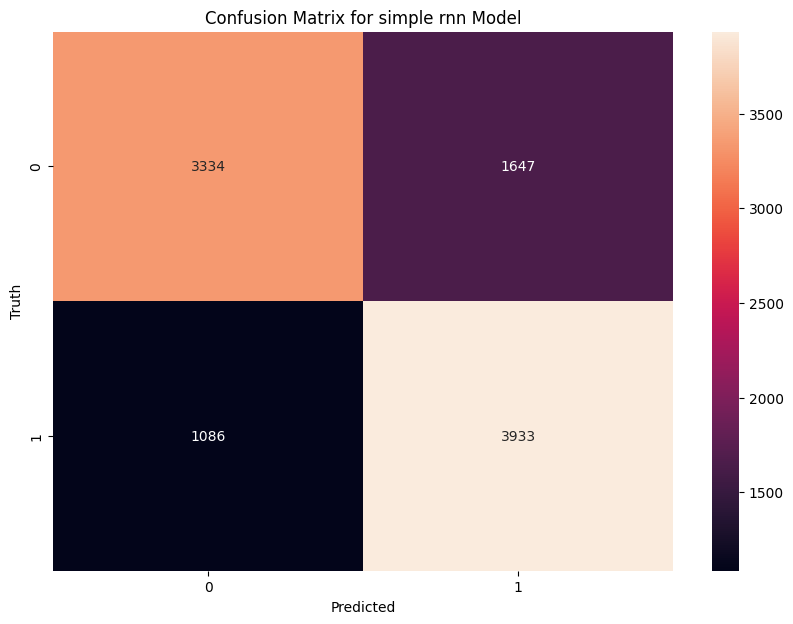

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate confusion matrix for LSTM model
y_pred_srnn = (model.predict(X_test) > 0.5).astype("int32")
cm_srnn = confusion_matrix(y_test, y_pred_srnn)

# Plot confusion matrix for simple rnn model
plt.figure(figsize=(10,7))
sns.heatmap(cm_srnn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for simple rnn Model')
plt.show()

**lstm Model**


In [15]:
from keras.layers import LSTM, Bidirectional
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [16]:
# Defining LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix]))
model_lstm.add(LSTM(10))  # Replacing the Dense layer with an LSTM layer
model_lstm.add(Dense(1, activation='sigmoid'))  # Output layer

model_lstm.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         12425300  
                                                                 
 lstm (LSTM)                 (None, 10)                4440      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12429751 (47.42 MB)
Trainable params: 12429751 (47.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1250/1250 [==============================] - 273s 217ms/step - loss: 0.4101 - accuracy: 0.8138 - val_loss: 0.2838 - val_accuracy: 0.8858
Epoch 2/20
1250/1250 [==============================] - 259s 207ms/step - loss: 0.1838 - accuracy: 0.9343 - val_loss: 0.2727 - val_accuracy: 0.8864
Epoch 3/20
1250/1250 [==============================] - 270s 216ms/step - loss: 0.0786 - accuracy: 0.9770 - val_loss: 0.3279 - val_accuracy: 0.8826
Epoch 4/20
1250/1250 [==============================] - 258s 207ms/step - loss: 0.0332 - accuracy: 0.9917 - val_loss: 0.4188 - val_accuracy: 0.8787
Epoch 5/20
1250/1250 [==============================] - 269s 215ms/step - loss: 0.0153 - accuracy: 0.9967 - val_loss: 0.5558 - val_accuracy: 0.8597
Epoch 6/20
1250/1250 [==============================] - 258s 207ms/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.5260 - val_accuracy: 0.8700
Epoch 7/20
1250/1250 [==============================] - 256s 205ms/step - loss: 0.0048 - accuracy: 0.9989 - val_

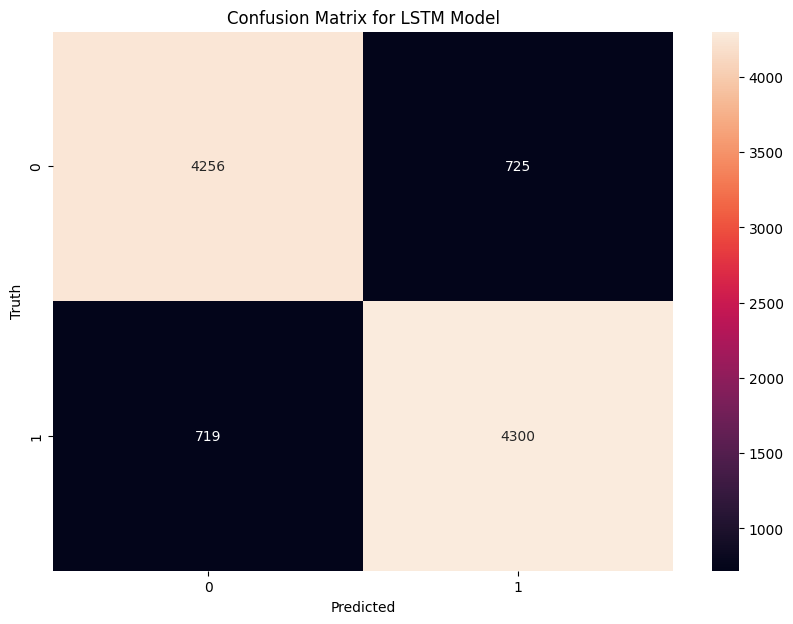

In [17]:
# Compile and train the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Test the model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print('Test accuracy for LSTM model:', accuracy)



# Generate confusion matrix for LSTM model
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Plot confusion matrix for LSTM model
plt.figure(figsize=(10,7))
sns.heatmap(cm_lstm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

In [18]:
# Improved Model with LSTM
improved_model_predictions = (model_lstm.predict(X_test) > 0.5).astype("int32")
accuracy_improved = accuracy_score(y_test, improved_model_predictions)
print("\nImproved Model with LSTM Accuracy:", accuracy_improved)
print("Classification Report for Improved Model with LSTM:")
print(classification_report(y_test, improved_model_predictions))

313/313 [==============================] - 4s 13ms/step

Improved Model with LSTM Accuracy: 0.8556
Classification Report for Improved Model with LSTM:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4981
           1       0.86      0.86      0.86      5019

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**BIDIRECTIONAL LSTM MODEL**

In [19]:
# Defining Bidirectional LSTM model
model_bilstm = Sequential()
model_bilstm.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix]))
model_bilstm.add(Bidirectional(LSTM(10)))  # Replacing the LSTM layer with a Bidirectional LSTM layer
model_bilstm.add(Dense(1, activation='sigmoid'))  # Output layer
print(model_bilstm.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f711496afb0>>


In [20]:
# Compile and train the model
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=20, batch_size=32)

# Test the model
loss, accuracy = model_bilstm.evaluate(X_test, y_test)
print('Test accuracy for Bidirectional LSTM model:', accuracy)

Epoch 1/20
1250/1250 [==============================] - 289s 229ms/step - loss: 0.4205 - accuracy: 0.8069
Epoch 2/20
1250/1250 [==============================] - 287s 229ms/step - loss: 0.1931 - accuracy: 0.9285
Epoch 3/20
1250/1250 [==============================] - 286s 229ms/step - loss: 0.0845 - accuracy: 0.9728
Epoch 4/20
1250/1250 [==============================] - 288s 230ms/step - loss: 0.0372 - accuracy: 0.9899
Epoch 5/20
1250/1250 [==============================] - 285s 228ms/step - loss: 0.0166 - accuracy: 0.9961
Epoch 6/20
1250/1250 [==============================] - 287s 230ms/step - loss: 0.0081 - accuracy: 0.9981
Epoch 7/20
1250/1250 [==============================] - 286s 229ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 8/20
1250/1250 [==============================] - 287s 229ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 9/20
1250/1250 [==============================] - 286s 229ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 10/20
1250/1250 [=======================

In [21]:
# Improved Model with Bidirectional LSTM
bidirectional_model_predictions = (model_bilstm.predict(X_test) > 0.5).astype("int32")
accuracy_bidirectional = accuracy_score(y_test, bidirectional_model_predictions)
print("\nImproved Model with Bidirectional LSTM Accuracy:", accuracy_bidirectional)
print("Classification Report for Improved Model with Bidirectional LSTM:")
print(classification_report(y_test, bidirectional_model_predictions))

313/313 [==============================] - 6s 18ms/step

Improved Model with Bidirectional LSTM Accuracy: 0.8585
Classification Report for Improved Model with Bidirectional LSTM:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4981
           1       0.85      0.87      0.86      5019

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [22]:
def predict_sentiment1(user_input):
    # Tokenize the user input
    user_input_tokenized = tokenizer.texts_to_sequences([user_input])

    # Pad the tokenized user input
    user_input_padded = pad_sequences(user_input_tokenized, maxlen=100)

    # using model to predict the sentiment of the user input
    prediction = model_lstm.predict(user_input_padded)

    # The prediction is a number between 0 and 1
    # We can interpret numbers close to 0 as negative sentiment and numbers close to 1 as positive sentiment
    if prediction < 0.5:
        return 'negative'
    else:
        return 'positive'

In [27]:
user_input = "it was utterly disgusting"
print(predict_sentiment1(user_input))


1/1 [==============================] - 0s 22ms/step
negative


In [26]:
user_input = "the movie was disgusting"
print(predict_sentiment1(user_input))


1/1 [==============================] - 0s 20ms/step
negative


In [28]:
user_input = "the movie was pretty nice"
print(predict_sentiment1(user_input))


1/1 [==============================] - 0s 50ms/step
positive
